# Healthy Nutritious UHT Beverage

The market for healthy and nutritious UHT (Ultra-High Temperature) beverages is evolving rapidly. With increasing consumer awareness about health and wellness, there's a growing demand for convenient yet nutritious drink options. Let's conduct some **simulated market research** to explore the potential market for a new innovative UHT beverage product in various global markets.

In [1]:
import json
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.insert(0, '..')

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.factory import TinyPersonFactory
from tinytroupe.validation import TinyPersonValidator
from tinytroupe import control

from tinytroupe.extraction import ResultsExtractor
from tinytroupe.profiling import Profiler


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: d:\windsurf_ai\TinyTroupe\examples\..\tinytroupe\config.ini
Found custom config on: d:\windsurf_ai\TinyTroupe\examples\config.ini

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2023-05-15
model = gpt-4o-mini
max_tokens = 4000
temperature = 0.9
freq_penalty = 0.3
presence_penalty = 0.0
timeout = 60
max_attempts = 5
waiting_time = 2
exponential_backoff_factor = 5
embedding_model = text-embedding-3-small
cache_api_calls = False
cache_file_name = openai_api_cache.pickle
max_content_display_length = 1024

[Simulation]
rai_harmful_content_prevention = True
rai_copyright_infringement_prevention = True

[Logging]
loglevel = ERROR



First of all, we'll use a cached simulation, to avoid having to recompute expensive steps unless really necessary. We accomplish this via the `control.begin()` function. The file it takes as an argument is the cache file that will be created and then updated as needed.

**Tip:** the ".cache." naming convention is used to indicate that the file is a cache file and will not be committed to the repository.

In [2]:
# Use the output directory for the cache file
control.begin("healthy_nutritious_UHT_beverage.cache.json")

## Prepare the survey and auxiliary elements

Main target nationality and population size.

In [3]:
target_nationality = "Malaysian"
population_size = 1

Should we also compute the other nationalities? This might take a while, so we leave it as an option.

In [4]:
compute_other_nationalities = True

Descriptions and standard questions for the survey.

In [5]:
def general_context(nationality="Malaysian"):
    return  f"""
           We are conducting comprehensive market research across {nationality} population to assess the potential for a new healthy UHT beverage product. Our goal is to gather a **representative random sample** that accurately reflects {nationality} consumers' preferences, particularly their beverage consumption habits and health consciousness.
           
           The sample will encompass the rich demographic diversity, including:
             - Various income levels across socioeconomic groups
             - Age groups: from young adults to senior citizens
             - Lifestyle choices: health-conscious to convenience-oriented
             - Cultural backgrounds: representing the diverse society
             - Educational backgrounds: across all levels
             - Occupations: from various professional sectors
             - Living environments: urban and suburban areas
             - Health awareness: from highly health-conscious to casual consumers
             - Shopping preferences: across different retail channels
              """

interviewer_introduction =\
    """
 We are conducting a market survey about healthy beverage preferences in Malaysia. 
 Could you please introduce yourself and share your top 10 interests, particularly those related to your lifestyle, health, and daily beverage consumption habits?
    """

interviewer_main_question =\
    """ 
If you saw a new healthy UHT beverage in your local supermarket today, would you purchase it? Please explain why or why not? 

We value your honest opinion and there are no right or wrong answers. Consider your current lifestyle, health preferences, daily routine, and budget when answering. Think about factors like:
- Your typical beverage choices
- Price sensitivity
- Health considerations
- Convenience needs

Please start your response with either "Yes, ", "No, " or "Maybe, " followed by your explanation.
    """

Common mechaniss.

In [6]:
results_extractor = ResultsExtractor(
    extraction_objective=(
        "Find whether the person would buy a healthy UHT beverage product in Malaysia. "
        "A person can say Yes, No or Maybe."
    ),
    situation=(
        "Agent was asked about their interest in purchasing a new healthy UHT beverage "
        "from their local supermarket. They can respond with Yes, No or Maybe."
    ),
    fields=["response", "justification"],
    fields_hints={
        "response": (
            "Must be a string formatted exactly as 'Yes', 'No', 'Maybe' or 'N/A'"
            "(if there is no response)."
        ),
        "justification": (
            "Reasons for the decision including factors like price, health benefits, "
            "convenience, and storage in Malaysian climate"
        ),
    },
    verbose=True
)

A function that will give us the statistics and then recommend us if we should go ahead and start a Nutritious UHT beverage business.

In [7]:
def is_there_a_good_market(df, yes_threshold=0.15, no_threshold=0.45):
    """
    Analyze market potential for healthy UHT beverage in Malaysian market.
    
    Args:
        df: DataFrame with survey responses
        yes_threshold: Minimum percentage of 'Yes' responses needed (default: 15%)
        no_threshold: Maximum percentage of 'No' responses allowed (default: 45%)
    """
    # Get response distribution
    counts = df["response"].value_counts()
    total = counts.sum()
    percentage = counts / total

    # Calculate and display response percentages
    percentage_yes = percentage.get("Yes", 0)
    print(f"Positive responses: {percentage_yes:.2%}")

    percentage_no = percentage.get("No", 0)
    print(f"Negative responses: {percentage_no:.2%}")

    percentage_maybe = percentage.get("Maybe", 0)
    print(f"Potential customers: {percentage_maybe:.2%}")

    percentage_na = percentage.get("N/A", 0)
    print(f"No response: {percentage_na:.2%}")

    # Market viability analysis
    if percentage_yes > yes_threshold and percentage_no < no_threshold:
        print("\nVERDICT: The Malaysian market shows good potential for a healthy UHT beverage.")
        return True
    else:
        print("\nVERDICT: The Malaysian market may need more analysis or product adjustment.")
        return False



## Build the audience

Summon an audience out of thin simulated air. To do so, we build a factory whose context defines our problem and target audience. Actual agents will be later sampled from this factory.

In [8]:
factory = TinyPersonFactory(general_context(target_nationality))

We can request a specific number of people.

In [9]:
people = factory.generate_people(population_size, verbose=True)

Generated person 1/1: Aisha Rahman is a 29 year old Marketing Executive, Malaysian, currently living in Malaysia. Aisha Rahman is not only dedicated to her role as a Marketing Executive but also embodies a vibrant and outgoing personality that makes her a natural networker. Her passion for health and wellness extends beyond her professional life; she enjoys cooking healthy meals and experimenting with new recipes, often sharing these culinary adventures with her best friend Farah. Aisha's competitive spirit drives her to stay updated on digital marketing trends, and she actively seeks out workshops to enhance her skills in consumer behavior and sustainable practices. Despite feeling slightly stressed about upcoming deadlines, her positive outlook helps her navigate challenges while maintaining a strong commitment to excellence in all her endeavors.


A quick look into the folks that were created:

In [10]:
factory.generated_minibios

["Aisha Rahman is a 29 year old Marketing Executive, Malaysian, currently living in Malaysia. Aisha Rahman is not only dedicated to her role as a Marketing Executive but also embodies a vibrant and outgoing personality that makes her a natural networker. Her passion for health and wellness extends beyond her professional life; she enjoys cooking healthy meals and experimenting with new recipes, often sharing these culinary adventures with her best friend Farah. Aisha's competitive spirit drives her to stay updated on digital marketing trends, and she actively seeks out workshops to enhance her skills in consumer behavior and sustainable practices. Despite feeling slightly stressed about upcoming deadlines, her positive outlook helps her navigate challenges while maintaining a strong commitment to excellence in all her endeavors."]

Checkpoint the simulation state to disk, to avoid having to re-run the expensive agent sampling process, unless really necessary.

In [11]:
control.checkpoint()

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [12]:
market = TinyWorld(f"Target audience ({target_nationality})", people, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [13]:
market.broadcast(interviewer_introduction)
market.broadcast(interviewer_main_question)

USER --> Aisha Rahman: [CONVERSATION] 
          >   We are conducting a market survey about healthy beverage preferences in Malaysia.
          > Could you please introduce yourself and share your top 10 interests, particularly those
          > related to your lifestyle, health, and daily beverage consumption habits?

USER --> Aisha Rahman: [CONVERSATION] 
          >   If you saw a new healthy UHT beverage in your local supermarket today, would you
          > purchase it? Please explain why or why not?   We value your honest opinion and there are
          > no right or wrong answers. Consider your current lifestyle, health preferences, daily
          > routine, and budget when answering. Think about factors like: - Your typical beverage
          > choices - Price sensitivity - Health considerations - Convenience needs  Please start
          > your response with either "Yes, ", "No, " or "Maybe, " followed by your explanation.

In [14]:
market.run(1)

───────────────────────────────────── Target audience (Malaysian) step 1 of 1 ─────────────────────────────────────

Aisha Rahman acts: [THINK] 
                  > I need to introduce myself and share my interests related to lifestyle, health,
                  > and beverage consumption. I should also consider my response to the question
                  > about purchasing a new healthy UHT beverage, reflecting on my typical choices,
                  > price sensitivity, health considerations, and convenience needs.

Aisha Rahman acts: [TALK] 
                  > Hello, my name is Aisha Rahman. I am 29 years old and I work as a marketing
                  > executive in a health food company. My top interests related to my lifestyle and
                  > health include cooking healthy meals, exploring digital marketing trends,
                  > attending workshops on consumer behavior, hiking, reading health-related books,
                  > experimenting with new recipes, analyzing market data, promoting sustainable
                  > practices, engaging in fitness activities, and staying updated on health and
                  > wellness news.

Aisha Rahman acts: [THINK] 
                  > I need to consider whether I would purchase a new healthy UHT beverage. I should
                  > think about my typical beverage choices, how much I am willing to spend, my
                  > health considerations, and how convenient it would be for me to buy it.

Aisha Rahman acts: [TALK] 
                  > Maybe, I would consider purchasing a new healthy UHT beverage if it aligns with
                  > my health preferences and fits within my budget. I typically choose beverages
                  > that are low in sugar and high in nutritional value, so if the new product meets
                  > those criteria, I would be interested. Additionally, if it is conveniently
                  > available at my local supermarket and reasonably priced, that would increase my
                  > likelihood of buying it.

Aisha Rahman acts: [DONE] 

In [15]:
control.checkpoint()

## Extract results and analyze

Now we can actually extract the results.

In [16]:
results = results_extractor.extract_results_from_agents(people)

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider purchasing a new healthy UHT beverage if it aligns with my health preferences and fits within my budget. I typically choose beverages that are low in sugar and high in nutritional value, so if the new product meets those criteria, I would be interested. Additionally, if it is conveniently available at my local supermarket and reasonably priced, that would increase my likelihood of buying it."}', 'refusal': None, 'role': 'assistant'}


In [17]:
# load a list of dicts into a pandas dataframe
df = pd.DataFrame(results)
df

,response,justification
0,Maybe,I would consider purchasing a new healthy UHT ...


<Axes: xlabel='response'>

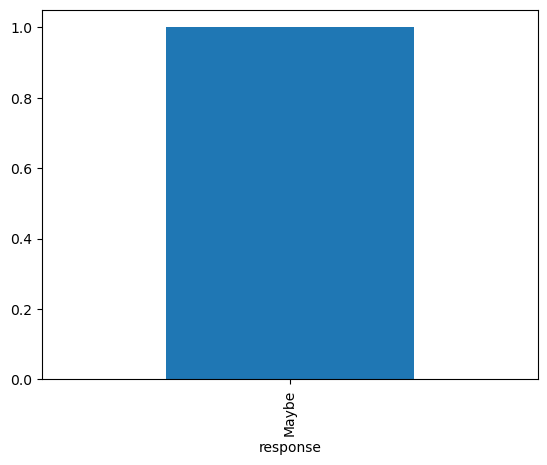

In [18]:
df["response"].value_counts().plot(kind='bar')

In [19]:
is_there_a_good_market(df)

Positive responses: 0.00%
Negative responses: 0.00%
Potential customers: 100.00%
No response: 0.00%

VERDICT: The Malaysian market may need more analysis or product adjustment.


False

## Benchmark: American market
Naturally, we'll want to compare the results of our market research with the results in America

In [20]:
factory_es = TinyPersonFactory(general_context(nationality="American"))
people_es = factory_es.generate_people(population_size, verbose=True)
control.checkpoint()

market_es = TinyWorld(f"Target audience (American)", people_es, broadcast_if_no_target=False)
market_es.broadcast(interviewer_introduction)
market_es.broadcast(interviewer_main_question)
market_es.run(1)
control.checkpoint()

Generated person 1/1: Marcus Thompson is a 29 year old Fitness Trainer, American, currently living in United States. Marcus Thompson is not only dedicated to his role as a fitness trainer but also possesses a deep passion for nutrition and wellness, constantly seeking to expand his knowledge in these areas. His weekends are often spent hiking and exploring nature, which fuels his love for photography, particularly capturing the beauty of the outdoors. While he maintains a friendly demeanor, his intensity can sometimes be overwhelming for clients who lack commitment, leading to moments of impatience. Despite the financial uncertainties that come with being self-employed, Marcus remains optimistic about developing community fitness programs and exploring online coaching to broaden his impact.


USER --> Marcus Thompson: [CONVERSATION] 
          >   We are conducting a market survey about healthy beverage preferences in Malaysia.
          > Could you please introduce yourself and share your top 10 interests, particularly those
          > related to your lifestyle, health, and daily beverage consumption habits?

USER --> Marcus Thompson: [CONVERSATION] 
          >   If you saw a new healthy UHT beverage in your local supermarket today, would you
          > purchase it? Please explain why or why not?   We value your honest opinion and there are
          > no right or wrong answers. Consider your current lifestyle, health preferences, daily
          > routine, and budget when answering. Think about factors like: - Your typical beverage
          > choices - Price sensitivity - Health considerations - Convenience needs  Please start
          > your response with either "Yes, ", "No, " or "Maybe, " followed by your explanation.

───────────────────────────────────── Target audience (American) step 1 of 1 ──────────────────────────────────────

Marcus Thompson acts: [THINK] 
                     > I need to introduce myself and share my interests related to lifestyle,
                     > health, and beverage consumption. I should also consider my typical beverage
                     > choices, price sensitivity, health considerations, and convenience needs when
                     > answering the question about purchasing a new healthy UHT beverage.

Marcus Thompson acts: [TALK] 
                     > Hello, my name is Marcus Thompson. I am a fitness trainer, and my interests
                     > include health and wellness, nutrition, outdoor activities like hiking,
                     > cooking healthy meals, and photography. I also enjoy learning about fitness
                     > trends and developing community fitness programs.

Marcus Thompson acts: [THINK] 
                     > Now I need to answer the question about whether I would purchase a new
                     > healthy UHT beverage. I should consider my typical beverage choices, price
                     > sensitivity, health considerations, and convenience needs.

Marcus Thompson acts: [TALK] 
                     > Maybe, I would consider purchasing a new healthy UHT beverage if it aligns
                     > with my health goals and fits within my budget. I typically choose beverages
                     > that are low in sugar and high in nutrients, so if the new product meets
                     > those criteria, I would be interested. However, if it's priced too high
                     > compared to similar options, I might hesitate to buy it due to budget
                     > constraints. Convenience is also important for me; if it's readily available
                     > at my local supermarket, that would increase the likelihood of my purchase.

Marcus Thompson acts: [DONE] 

In [21]:
results_es = results_extractor.extract_results_from_agents(people_es)
df_es = pd.DataFrame(results_es)
df_es

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider purchasing a new healthy UHT beverage if it aligns with my health goals and fits within my budget. I typically choose beverages that are low in sugar and high in nutrients, so if the new product meets those criteria, I would be interested. However, if it\'s priced too high compared to similar options, I might hesitate to buy it due to budget constraints. Convenience is also important for me; if it\'s readily available at my local supermarket, that would increase the likelihood of my purchase."}', 'refusal': None, 'role': 'assistant'}


,response,justification
0,Maybe,I would consider purchasing a new healthy UHT ...


<Axes: xlabel='response'>

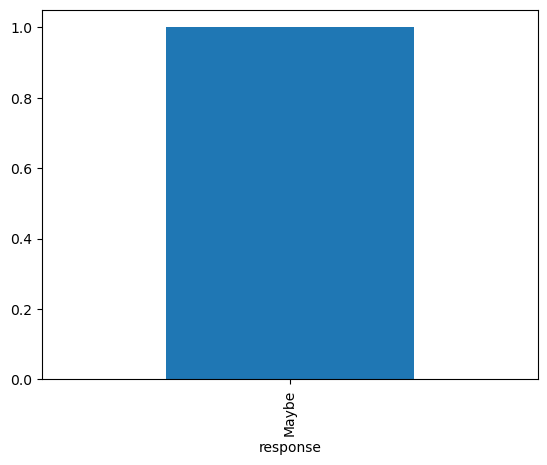

In [22]:
df_es["response"].value_counts().plot(kind='bar')

In [24]:
is_there_a_good_market(df_es)

Positive responses: 0.00%
Negative responses: 0.00%
Potential customers: 100.00%
No response: 0.00%

VERDICT: The Malaysian market may need more analysis or product adjustment.


False

So how the target market compares with the American benchmark?

In [25]:
# compare df with df_es

# % of yes
percentage_yes = df["response"].value_counts(normalize=True).get("Yes", 0)
percentage_yes_es = df_es["response"].value_counts(normalize=True).get("Yes", 0)
print(f"Percentage of 'Yes' responses in the target market: {percentage_yes:.2%}")
print(f"Percentage of 'Yes' responses in America: {percentage_yes_es:.2%}")
# how much more likely are people in Spain to buy the product?
if percentage_yes != 0:
    print(f"Americans people are {percentage_yes_es / percentage_yes:.2f} times more likely to buy the product.")

# % of no
percentage_no = df["response"].value_counts(normalize=True).get("No", 0)
percentage_no_es = df_es["response"].value_counts(normalize=True).get("No", 0)
print(f"Percentage of 'No' responses in the target market: {percentage_no:.2%}")
print(f"Percentage of 'No' responses in America: {percentage_no_es:.2%}")
# how much more likely are people in Spain to not buy the product?
if percentage_no != 0:
    print(f"Americans people are {percentage_no_es / percentage_no:.2f} times more likely to not buy the product.")

Percentage of 'Yes' responses in the target market: 0.00%
Percentage of 'Yes' responses in America: 0.00%
Percentage of 'No' responses in the target market: 0.00%
Percentage of 'No' responses in Spain: 0.00%


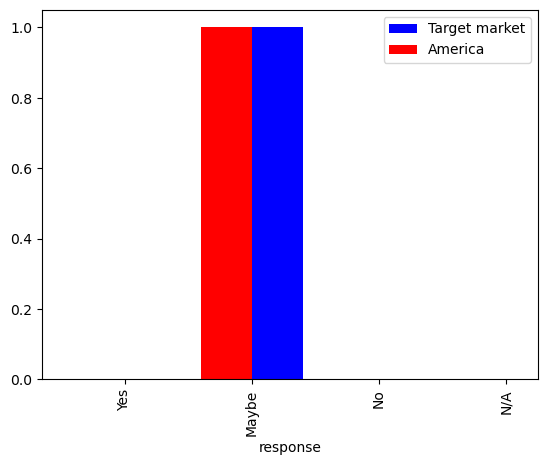

In [27]:
# compare charts. Put both bars in the same plot, for easier comparison
# Need to order the labels in the chart.
fig, ax = plt.subplots()
df["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='blue', position=0, width=0.4, label="Target market", ax=ax)
df_es["response"].value_counts().reindex(["Yes", "Maybe", "No", "N/A"]).plot(kind='bar', color='red', position=1, width=0.4, label="America", ax=ax)
plt.legend()
plt.show()



## Other countries

Should we compute other nationalities? This might take a while, so we leave it as an option.

In [28]:
if not compute_other_nationalities:
    control.end()
    raise KeyboardInterrupt

Here's a convenience function to perform the same analysis for other countries more easily.

In [29]:
def market_research_simulation(nationality, population_size, results_extractor):
    factory = TinyPersonFactory(general_context(nationality=nationality))
    people = factory.generate_people(population_size, verbose=True)
    market = TinyWorld(f"Target audience ({nationality})", people, broadcast_if_no_target=False)
    control.checkpoint()

    market.broadcast(interviewer_introduction)
    market.broadcast(interviewer_main_question)
    market.run(1)
    control.checkpoint()
    
    results = results_extractor.extract_results_from_agents(people)
    df = pd.DataFrame(results)

    return df


### Singapore

In [30]:
df_sg = market_research_simulation("Singaporean", 
                                   population_size=population_size, 
                                   results_extractor=results_extractor)

Generated person 1/1: Jasmine Tan is a 29 year old Marketing Executive, Singaporean, currently living in Singapore. Jasmine Tan is not only dedicated to her role as a Marketing Executive but also embodies a vibrant and active lifestyle. Her mornings are filled with yoga, which sets a positive tone for her day, while her lunch breaks spent walking in the park help her maintain clarity and focus. Outside of work, she enjoys cooking healthy meals and experimenting with new recipes, reflecting her passion for health and wellness. With a keen interest in digital marketing trends and sustainable practices, Jasmine is always looking to enhance her skills, particularly in understanding consumer behavior within the beverage industry.


USER --> Jasmine Tan: [CONVERSATION] 
          >   We are conducting a market survey about healthy beverage preferences in Malaysia.
          > Could you please introduce yourself and share your top 10 interests, particularly those
          > related to your lifestyle, health, and daily beverage consumption habits?

USER --> Jasmine Tan: [CONVERSATION] 
          >   If you saw a new healthy UHT beverage in your local supermarket today, would you
          > purchase it? Please explain why or why not?   We value your honest opinion and there are
          > no right or wrong answers. Consider your current lifestyle, health preferences, daily
          > routine, and budget when answering. Think about factors like: - Your typical beverage
          > choices - Price sensitivity - Health considerations - Convenience needs  Please start
          > your response with either "Yes, ", "No, " or "Maybe, " followed by your explanation.

──────────────────────────────────── Target audience (Singaporean) step 1 of 1 ────────────────────────────────────

Jasmine Tan acts: [THINK] 
                 > I need to introduce myself and share my interests related to lifestyle, health,
                 > and beverage consumption. I should also consider my response to the question
                 > about purchasing a new healthy UHT beverage, reflecting on my typical choices,
                 > price sensitivity, health considerations, and convenience needs.

Jasmine Tan acts: [TALK] 
                 > Hello! My name is Jasmine Tan, and I'm a 29-year-old marketing executive from
                 > Singapore. I have a strong passion for health and wellness, which influences my
                 > lifestyle choices. Here are my top 10 interests related to my lifestyle and
                 > beverage consumption: 1. Healthy cooking, 2. Yoga and fitness, 3. Hiking and
                 > exploring nature, 4. Digital marketing trends, 5. Consumer behavior in the
                 > beverage industry, 6. Sustainable practices in marketing, 7. Photography
                 > (especially food and nature), 8. Reading self-help books, 9. Experimenting with
                 > new healthy recipes, and 10. Engaging in community wellness activities.

Jasmine Tan acts: [THINK] 
                 > Now I need to respond to the question about whether I would purchase a new
                 > healthy UHT beverage. I should consider my typical beverage choices, price
                 > sensitivity, health considerations, and convenience needs before forming my
                 > answer.

Jasmine Tan acts: [TALK] 
                 > Maybe, I would consider purchasing a new healthy UHT beverage if it aligns with
                 > my health preferences and fits within my budget. I typically choose beverages
                 > that are low in sugar and high in nutritional value, so if the new product meets
                 > those criteria, I would be interested. Additionally, convenience is important to
                 > me, so if it's readily available at my local supermarket, that would also
                 > influence my decision.

Jasmine Tan acts: [DONE] 

Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I would consider purchasing a new healthy UHT beverage if it aligns with my health preferences and fits within my budget. I typically choose beverages that are low in sugar and high in nutritional value, so if the new product meets those criteria, I would be interested. Additionally, convenience is important to me, so if it\'s readily available at my local supermarket, that would also influence my decision."}', 'refusal': None, 'role': 'assistant'}


In [31]:
df_sg

,response,justification
0,Maybe,I would consider purchasing a new healthy UHT ...


<Axes: xlabel='response'>

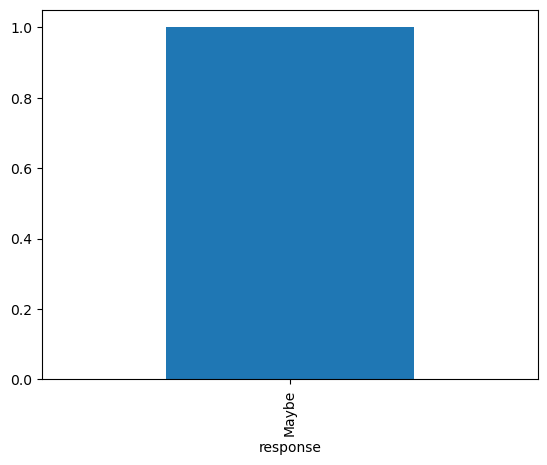

In [32]:
df_sg["response"].value_counts().plot(kind='bar')

In [34]:
is_there_a_good_market(df_sg)

Positive responses: 0.00%
Negative responses: 0.00%
Potential customers: 100.00%
No response: 0.00%

VERDICT: The Malaysian market may need more analysis or product adjustment.


False

In [35]:
control.end()